<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-Multi_Layer_Perceptron/blob/main/Tugas_ML_MLP_Adhit_Daniel_Rian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Multi Layer Perceptron

Alexius Adhitya K            - 18/424179/PA/18284\
Daniel Suranta Sitepu       - 18/424185/PA/18290\
Fransiskus Rian Wardana P   - 18/427592/PA/18552

Spesifikasi:
Multi Layer Perceptron => 1 hidden layer

Ukuran gambar: 320p x 240p, jika tidak sesuai, resize ke 320x240\
Jumlah neuron pada input layer: 320x240 = 76800\
Jumlah neuron pada hidden layer: 80\
Jumlah neuron pada output layer: 3 (one hot encoding)\
Jumlah class: 3 => [rose, sunflower, dandelion]\
Jumlah data per class: 100 gambar, 80 train data, 20 test data

### Import Libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image
from random import shuffle
import numpy as np
from google.colab import drive
import zipfile

### Fungsi Definisi Arsitektur

In [ ]:
def defineStructure(X, Y):
    input = X.shape[0]  # size of input layer
    hidden = 80         # hidden layer of size 4
    output = Y.shape[0] # size of output layer
    return (input, hidden, output)

# (input, hidden, output) = define_structure(X_TRAIN, Y_TRAIN)
# print("The size of the input layer is:  = " + str(input_unit))
# print("The size of the hidden layer is:  = " + str(hidden_unit))
# print("The size of the output layer is:  = " + str(output_unit))

### Fungsi Load Dataset - Visualisasi Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FILE_PATH = '/content/drive/MyDrive/File Tugas PP dan ML/flowers.zip'

EXTRACTED_PATH = '/tmp/flowers/'
RESIZED_PATH = '/tmp/resized/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData():
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(RESIZED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                new_img.save(RESIZED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1

loadData()

In [ ]:
shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

print(len(ROSE_DATA))
print(ROSE_DATA[0][0])
# 12313123123.jpg
print(ROSE_DATA[0][1])
# rose

100
7471890786_aaff777641_n.jpg
rose


['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5


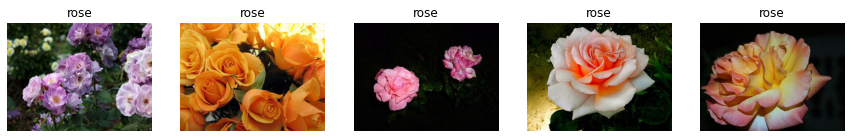

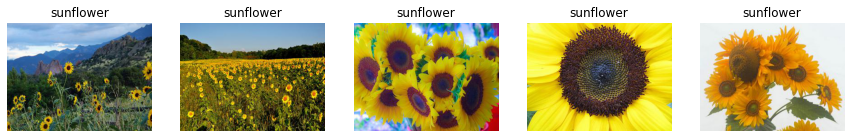

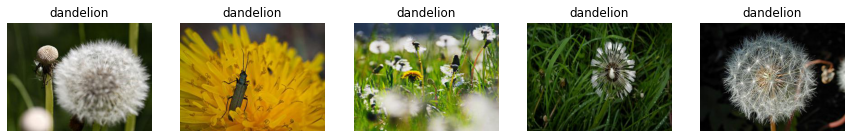

In [ ]:
def displayImages(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []
  if final:
      folder = FINAL_PATH
  else:
      folder = RESIZED_PATH
  subdirs = os.listdir(folder)
  print(subdirs)
  for subdir in subdirs:
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
#   images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    if final:
        plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(image)
    
displayImages(ROSE_DATA[:5], False)
displayImages(SUNFLOWER_DATA[:5], False)
displayImages(DANDELION_DATA[:5], False)

['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5


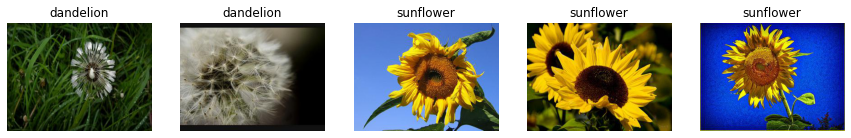

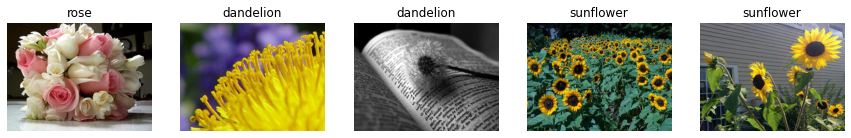

In [ ]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

### Fungsi Grayscale

In [ ]:
def convert2Grayscale(images, folder_name):
    os.makedirs(os.path.dirname(FINAL_PATH + folder_name + '/'), exist_ok=True)
    images2convert = [(Image.open(RESIZED_PATH + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
    for i, (image, image_class) in enumerate(images2convert):
        new_image = image.convert('L')
        new_image.save(FINAL_PATH + folder_name + '/' + images[i][0])

convert2Grayscale(TRAIN_DATA, "train_data")
convert2Grayscale(TEST_DATA, "test_data")
print(TRAIN_DATA[:5], TEST_DATA[:5])

[('151898652_b5f1c70b98_n.jpg', 'sunflower'), ('12471290635_1f9e3aae16_n.jpg', 'sunflower'), ('14925397351_c7f209d804_n.jpg', 'sunflower'), ('8831808134_315aedb37b.jpg', 'dandelion'), ('4601270210_60136f2b87_n.jpg', 'dandelion')] [('9588522189_db6166f67f.jpg', 'sunflower'), ('2949945463_366bc63079_n.jpg', 'rose'), ('15066430311_fb57fa92b0_m.jpg', 'sunflower'), ('16987075_9a690a2183.jpg', 'dandelion'), ('32558425090_d6b6e86d85_n.jpg', 'dandelion')]


['train_data', 'test_data']
6


ValueError: ignored

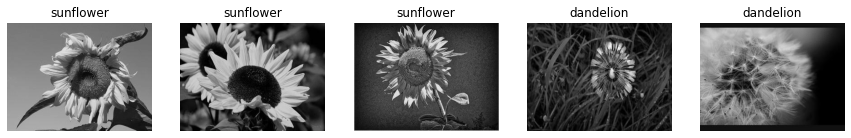

In [ ]:
displayImages(TRAIN_DATA[:5], True)
displayImages(TEST_DATA[:5], True)

### Image to numpy array

In [ ]:
def convert2npArray(images, folder_name):
    """
    params:
    -------
    images: list([nama_file, flower_class])
    folder_name: str(roses | dandelion | sunflower | train_data | test_data)
    
    returns:
    --------
    tuple(np.ndarray(X), list(classes))
    """
    array = []
    flowers = []
    for img, flower in images:
        data = np.asarray(Image.open(FINAL_PATH + folder_name + img))
        # print(type(data))
        # print(data.shape)
        array.append(data.flatten() / 255.0)
        # if flower == "rose":
        #   flowers.append(np.array([0,0], dtype=np.float32))
        # if flower == "dandelion":
        #   flowers.append(np.array([0,1], dtype=np.float32))
        # if flower == "sunflower":
        #   flowers.append(np.array([1,0], dtype=np.float32))
        if flower == "rose":
          flowers.append(np.array([0,0,1], dtype=np.float32))
        if flower == "dandelion":
          flowers.append(np.array([0,1,0], dtype=np.float32))
        if flower == "sunflower":
          flowers.append(np.array([1,0,0], dtype=np.float32))
    return np.array(array, dtype=np.float32), np.array(flowers, dtype=np.float32)



TRAIN_X, TRAIN_Y = convert2npArray(TRAIN_DATA, "train_data/")
TEST_X, TEST_Y = convert2npArray(TEST_DATA, "test_data/")
X_train = TRAIN_X.T
print(TRAIN_Y.shape)
Y_train = TRAIN_Y.reshape(3, TRAIN_Y.shape[0])
print(Y_train.shape)
X_test = TEST_X.T
Y_test = TEST_Y.reshape(3, TEST_Y.shape[0])
print(TRAIN_X.shape)
# print(X_train)
# print(y_train)

print ('Train X Shape:', X_train.shape)
print ('Train Y Shape:', Y_train.shape)
print ('I have m = {} training examples!'.format(X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

(240, 3)
(3, 240)
(240, 76800)
Train X Shape: (76800, 240)
Train Y Shape: (3, 240)
I have m = 240 training examples!

Test X Shape:  (76800, 60)


### Fungsi Aktivasi Sigmoid

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Fungsi Backpropagation - Init bobot dan bias

In [ ]:
def parametersInitialization(input_unit, hidden_unit, output_unit):
    # np.random.seed(2) 
    print(input_unit, hidden_unit, output_unit)
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Fungsi Backpropagation - Error

In [ ]:
def crossEntropyCost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

def gradientDescent(parameters, grads, learning_rate = 0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

### Fungsi Backpropagation - Feedforward

In [ ]:
def forwardPropagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

### Fungsi Backpropagation - Backward

In [ ]:
def backwardPropagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

### Fungsi Backpropagation - Prediksi

In [ ]:
def predictionBin(parameters, X, Y):
    A2, cache = forward_propagation(X, parameters)
    # predictions = np.round(A2)
    # predicted=(sigmoid(A2))
    print(A2)
    true_matrix = []
    return true_matrix

def prediction(parameters, X, Y):
    A2, cache = forwardPropagation(X, parameters)
    predictions = np.round(A2)
    predicted=(np.argmax(A2, axis=0))
    real=(np.argmax(Y, axis=0))
    dataLength = len(predicted)
    # print(predicted)
    # print(real)
    true_matrix = []
    # accuracy=0
    # error=0
    for i in range(len(predicted)):
      # print(predicted[i])
      if predicted[i]==real[i]:
        true_matrix.append(1)
        # accuracy+=1
      else:
        true_matrix.append(0)
        # error+=1
    # accuracy = accuracy/dataLength
    # error = error/dataLength
    # print(true_matrix)
    # print('acc = ',accuracy,'err = ', error)
    return predicted, true_matrix

# def prediction(parameters, X, Y):
#     A2, cache = forwardPropagation(X, parameters)
#     predictions = np.round(A2)
#     predicted=(np.argmax(A2, axis=0))
#     real=(np.argmax(Y, axis=0))
#     dataLength = len(predicted)
#     # print(predicted)
#     # print(real)
#     true_matrix = []
#     accuracy=0
#     error=0
#     for i in range(len(predicted)):
#       # print(predicted[i])
#       if predicted[i]==real[i]:
#         true_matrix.append(1)
#         accuracy+=1
#       else:
#         true_matrix.append(0)
#         error+=1
#     accuracy = accuracy/dataLength
#     error = error/dataLength
#     # print(true_matrix)
#     print('acc = ',accuracy,'err = ', error)
#     return true_matrix, accuracy, error

### Fungsi Backpropagation - Akurasi

In [ ]:
def accuracy(predictions, Y):
    real = np.argmax(Y, axis=0)
    dataLength = len(predictions)
    acc = 0
    error = 0
    for i in range(len(predictions)):
        if predictions[i] == real[i]:
            acc += 1
        else:
            error += 1
    acc = acc/dataLength
    error = error/dataLength
    print(f'acc = {acc}\terr = {error}')
    return acc, error

### Fungsi Backpropagation - Training Testing

In [ ]:
def training(X, Y, hidden_unit, num_iterations = 1000, learning_rate = 0.1):
    np.random.seed(3)
    input_unit = defineStructure(X, Y)[0]
    output_unit = defineStructure(X, Y)[2]
    
    parameters = parametersInitialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    accList = []
    error = []
    for i in range(0, num_iterations):
        A2, cache = forwardPropagation(X, parameters)
        cost = crossEntropyCost(A2, Y, parameters)
        grads = backwardPropagation(parameters, cache, X, Y)
        parameters = gradientDescent(parameters, grads, learning_rate)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        predictions, true_matrix = prediction(parameters, X, Y)
        acc, err = accuracy(predictions, Y)
        # predictions, acc, err = prediction(parameters, X, Y)
        accList.append(acc)
        error.append(err)
      
    
    return parameters, accList, error

(input_unit, hidden_unit, output_unit) = defineStructure(X_train, Y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))
parameters, accList, errorList = training(X_train, Y_train, 80, num_iterations=50)
predictions = prediction(parameters, X_test, Y_test)
acc, err = accuracy(predictions[0], Y_test)


The size of the input layer is:  = 76800
The size of the hidden layer is:  = 80
The size of the output layer is:  = 3
76800 80 3
Cost after iteration 0: 2.087871
acc = 0.22083333333333333	err = 0.7791666666666667
acc = 0.225	err = 0.775
acc = 0.2	err = 0.8
acc = 0.20833333333333334	err = 0.7916666666666666
acc = 0.2375	err = 0.7625
Cost after iteration 5: 1.904987
acc = 0.2625	err = 0.7375
acc = 0.275	err = 0.725
acc = 0.30416666666666664	err = 0.6958333333333333
acc = 0.32083333333333336	err = 0.6791666666666667
acc = 0.3333333333333333	err = 0.6666666666666666
Cost after iteration 10: 1.897822
acc = 0.35	err = 0.65
acc = 0.36666666666666664	err = 0.6333333333333333
acc = 0.36666666666666664	err = 0.6333333333333333
acc = 0.375	err = 0.625
acc = 0.37083333333333335	err = 0.6291666666666667
Cost after iteration 15: 1.888685
acc = 0.38333333333333336	err = 0.6166666666666667
acc = 0.38333333333333336	err = 0.6166666666666667
acc = 0.4125	err = 0.5875
acc = 0.3958333333333333	err = 0.604

### Visualisasi akurasi dan error

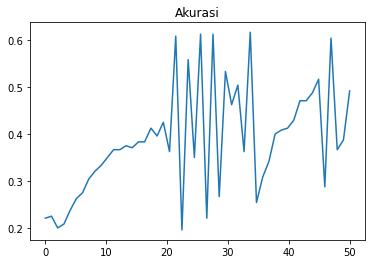

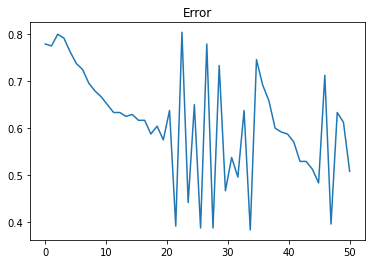

In [ ]:
# Visualize

def visualize(arr, title=''):
    x_axis = np.linspace(0, len(arr), len(arr))
    plt.plot(x_axis, arr)
    # plt.axis([0,len(arr), 0, 1])
    plt.title(title)
    plt.show()
visualize(accList, 'Akurasi')
visualize(errorList, 'Error')
# accList